# Lecture 4: Floats & Random Numbers

Date: 09/12/2017, Tuesday

In [1]:
format compact
format long % print more digits

## Floating point number system

Double precision:

$$
x = \pm(1+f)2^e \\
0 \le 2^{t}f<2^{t}, t=52 \\
-1022 \le e \le 1023
$$

(See lecture slides or textbook for more explantion. This website focuses on codes.)

### About parameters

How many binary bits are needed to store $e$:

In [2]:
log2(2048)

ans =
    11


### Maximum value

Calculate the maximum value of $x$ from the formula.

In [3]:
t=52;
f=(2^t-1)/2^t;
(1+f)*2^1023

ans =
    1.797693134862316e+308


Compare with the built-in function

In [4]:
realmax

ans =
    1.797693134862316e+308


What happens if the value exceeds `realmax`?

In [5]:
2e308

ans =
   Inf


### Minimum (absolute) value

From the formula

In [6]:
2^-1022

ans =
    2.225073858507201e-308


Compare with the built-in function

In [7]:
realmin

ans =
    2.225073858507201e-308


MATLAB allows you to go lower than `realmin`, but no too much.

In [8]:
for k=-321:-1:-325
    fprintf('k = %d, 10^k = %e \n',k,10^k)
end

k = -321, 10^k = 9.980126e-322 
k = -322, 10^k = 9.881313e-323 
k = -323, 10^k = 9.881313e-324 
k = -324, 10^k = 0.000000e+00 
k = -325, 10^k = 0.000000e+00 


$10^{-323}$ can be scaled up:

In [9]:
1e-323 * 1e300

ans =
     9.881312916824931e-24


But $10^{-324}$ can't, as it becomes exactly 0.

In [10]:
1e-324 * 1e300

ans =
     0


### Machine precision

#### Compute machine precision

From the formula $0 \le 2^{t}f<2^{t}, t=52$

In [11]:
2^(-52)

ans =
     2.220446049250313e-16


Built-in function:

In [12]:
eps

ans =
     2.220446049250313e-16


Another ways to get `eps`

In [13]:
1.0-(0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1) % equals to eps/2

ans =
     1.110223024625157e-16


In [14]:
7/3-4/3-1 % equals to eps

ans =
     2.220446049250313e-16


#### Difference between eps and realmin

`realmin` is about **abosolute** magnitude, while `eps` is about **relative** accuracy. Although a double-precision number can represent a value as small as $10^{-323}$ (i.e. `realmin`), the relative error of arithmetic operations can be as large as $10^{-16}$ (i.e. `eps`). 

Adding $10^{-16}$ to 1.0 has no effect at all. 

In [15]:
1.0+1e-16-1.0

ans =
     0


Adding $10^{-15}$ to 1.0 has some effect, although the result is quite inaccurate.

In [16]:
1.0+1e-15-1.0

ans =
     1.110223024625157e-15


### Not a number

In [17]:
0/0

ans =
   NaN


In [18]:
Inf - Inf

ans =
   NaN


However, `Inf` can sometimes be meaningful: (MATLAB-only. Not true in low-level languages.)

In [19]:
5/Inf

ans =
     0


In [20]:
5/0

ans =
   Inf


## Random numbers

[Linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)

In [21]:
a = 22695477;
c = 1;
m = 2^32;
N = 2000;

X = zeros(N,1);
X(1) = 1000;
for j=2:N
    X(j)=mod(a*X(j-1)+c,m);
end

R = X/m;

Hmm... looks pretty random🤔

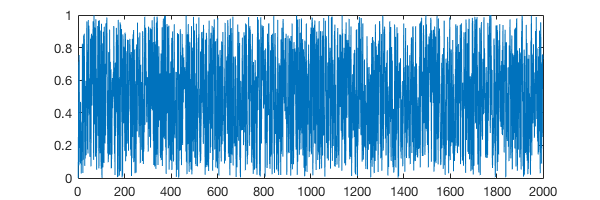

In [22]:
%plot --size 600,200
plot(R);

The data also looks like evenly-distributed.

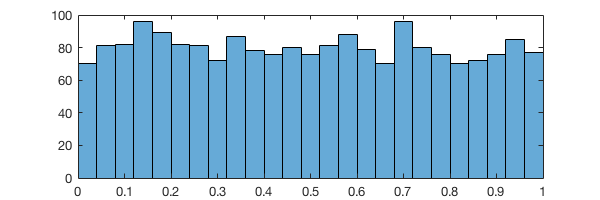

In [23]:
nbins = 25;
histogram(R, nbins);